# Library imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils.utils import ImageDatasetFromDirectory, draw_images
from utils.model import Model
from utils.utils import accuracy
from torch.utils.data import DataLoader

from collections import defaultdict

# Creating our dataets

In [2]:
# paths to our datasets

train_path = "./dataset/train/"
test_path = "./dataset/test/"

# Initiate our datasets

train_dataset = ImageDatasetFromDirectory(train_path)
test_dataset = ImageDatasetFromDirectory(test_path)

# Visualizing our data

Text(0.5, 1.0, 'Number of Images in Each dataset\n test/train ratio is 25.00%')

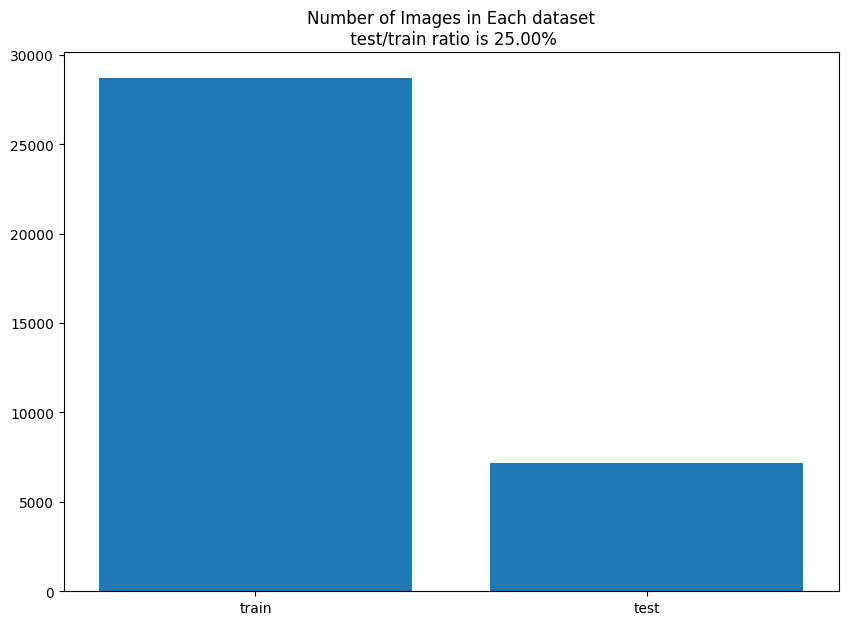

In [3]:
# First we take a look at how many images are in each
# of our datasets

number_of_images = {"train": len(train_dataset),
                    "test": len(test_dataset)}

plt.figure(figsize=(10, 7))

plt.bar(number_of_images.keys(),
        number_of_images.values(),
        )
plt.title(f"Number of Images in Each dataset\n test/train ratio is {len(test_dataset)/ len(train_dataset)*100:.2f}%")

In [4]:
# Now we take a look at how many images are in each category in the train dataset

number_of_images_in_category = defaultdict(int)

for image, target in train_dataset:
    number_of_images_in_category[int(target)] += 1



TypeError: ToTensor.__init__() got an unexpected keyword argument 'dtype'

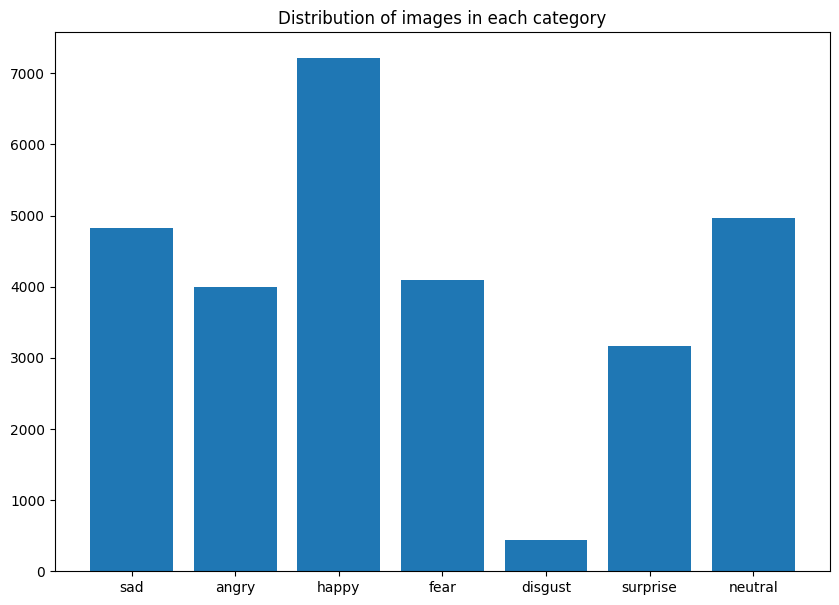

In [57]:
plt.figure(figsize=(10, 7))

plt.bar(number_of_images_in_category.keys(),
        number_of_images_in_category.values())
plt.xticks(list(train_dataset.targets.keys()), 
           labels=list(train_dataset.targets.values()))

plt.title("Distribution of images in each category");

As you can see we have a lot of `happy` images and too few `disgust` images which can effect the accuracy of our model.
* Will see if our model performs better on `happy` images
* Will test if our model performs worst on `disgust` images
* other categories almost have the same distribution so it's likely to have almost the same accuracy on them

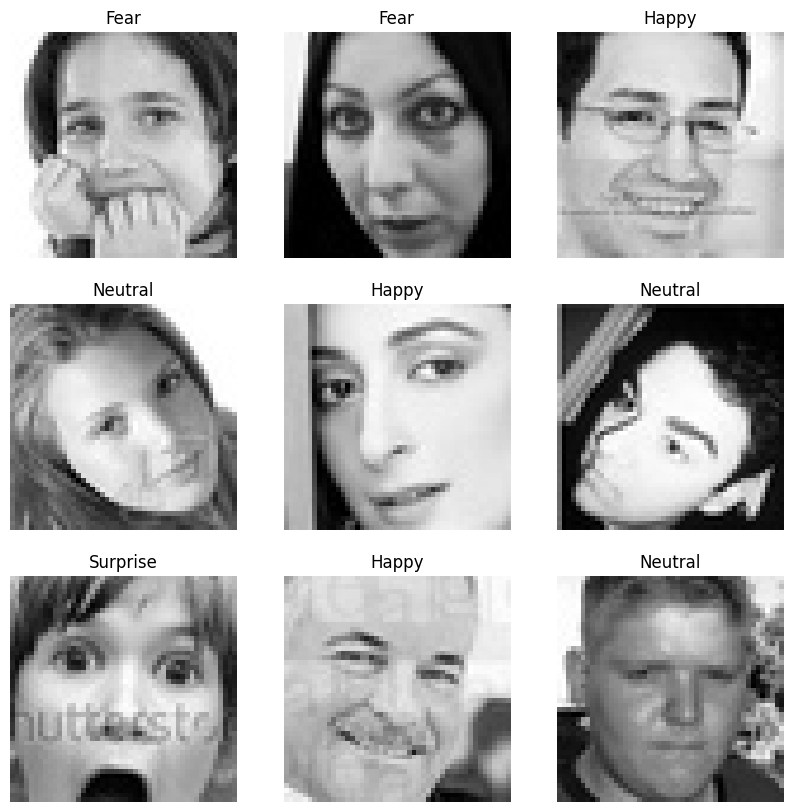

In [5]:
# A visualization of some of the random chosen images

draw_images(train_path)

# Creating our dataloaders, Models, loss function, and optimizer

In [11]:
# Our dataloaders

train_dl = DataLoader(train_dataset, batch_size=32,
                      shuffle=True)

test_dl = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [12]:
# Our model, loss, and optimizer

device = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(number_of_classes=len(train_dataset.targets.keys()))

model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters())

In [ ]:
# Train the model